<a href="https://colab.research.google.com/github/WarrPath/Bank-Subscriptions/blob/main/Bank_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**

A Portuguese Bank found that many of their customers are not investing in long term deposit accounts. The bank would like to identify customers that have a higher chance of subscribing for a long term deposit account and focus their marketing efforts on such customers.

**Import Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline

**Load Bank CSV File**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-full - project_3.csv to bank-full - project_3.csv


In [ ]:
bank_df = pd.read_csv('bank-full - project_3.csv')

**Data Preprocessing**

Check for null values.

In [ ]:
bank_df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Check for duplicate values.

In [ ]:
bank_df.duplicated().sum()

0

Check data types

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  subscribed  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Counts of 'no'/'yes' subscribed to term deposit account.

In [ ]:
bank_df['subscribed'].value_counts()

no     39922
yes     5289
Name: subscribed, dtype: int64

**Data Analysis**

Statistical information on numerical data.

In [ ]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
fig = px.histogram(bank_df, x = 'job', color = 'subscribed', barmode = 'group')
fig.update_layout(title_x = 0.5, title_text = '<b>Job Types')
fig.update_xaxes(tickangle = 45)

In [ ]:
fig = px.histogram(bank_df, x = 'marital', color = 'subscribed', barmode = 'group')
fig.update_layout(title_x = 0.5, title_text = '<b>Marital-Status')

In [ ]:
fig = px.histogram(bank_df, x = 'education', color = 'subscribed', barmode = 'group')
fig.update_layout(title_x = 0.5, title_text = '<b>Education Level')

In [ ]:
fig = px.histogram(bank_df, x = 'month', color = 'subscribed', barmode = 'group')
fig.update_layout(title_x = 0.5, title_text = '<b>Last Month of Contact')

In [ ]:
fig = px.histogram(bank_df, x = 'poutcome', color = 'subscribed', barmode = 'group')
fig.update_layout(title_x = 0.5, title_text = '<b>Previous Marketing Campaign Outcome')

In [ ]:
avg = bank_df.groupby(['job'], as_index = False)['balance'].mean()
avg['balance'] = round(avg['balance'], 1)
fig = px.bar(avg.sort_values(by = 'balance', ascending = False), x = 'job', y = 'balance', text = 'balance', color = 'job', template = 'ggplot2')
fig.update_traces(marker = dict(line = dict(color = '#000000', width = 1.2)))
fig.update_layout(title_x = 0.5, title_text = '<b>Average Balance by Job Type', legend_title_text = 'Job Type')

In [ ]:
avg = bank_df.groupby(['marital'], as_index = False)['balance'].mean()
avg['balance'] = round(avg['balance'], 1)
fig = px.bar(avg.sort_values(by = 'balance', ascending = False), x = 'marital', y = 'balance', text = 'balance', color = 'marital', template = 'ggplot2')
fig.update_traces(marker = dict(line = dict(color = '#000000', width = 1.2)))
fig.update_layout(title_x = 0.5, title_text = '<b>Average Balance by Marital-Status', legend_title_text = 'Marital Status')

In [ ]:
avg = bank_df.groupby(['education'], as_index = False)['balance'].mean()
avg['balance'] = round(avg['balance'], 1)
fig = px.bar(avg.sort_values(by = 'balance', ascending = False), x = 'education', y = 'balance', text = 'balance', color = 'education', template = 'ggplot2')
fig.update_traces(marker = dict(line = dict(color = '#000000', width = 1.2)))
fig.update_layout(title_x = 0.5, title_text = '<b>Average Balance by Education Level', legend_title_text = 'Education Level')

In [ ]:
avg = bank_df.groupby(['age'], as_index = False)['balance'].mean()
avg['balance'] = round(avg['balance'], 1)
fig = px.bar(avg.sort_values(by = 'balance', ascending = False), x = 'age', y = 'balance', text = 'balance', color = 'age', template = 'ggplot2')
fig.update_traces(marker = dict(line = dict(color = '#000000', width = 1.2)))
fig.update_layout(title_x = 0.5, title_text = '<b>Average Balance by Age', legend_title_text = 'Age')

**More Preprocessing**

List of all column headers.

In [ ]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Encode/transform categorical data to numeric labels.

In [ ]:
le = LabelEncoder()
bank_df['job']=le.fit_transform(bank_df['job'])
bank_df['marital']=le.fit_transform(bank_df['marital'])
bank_df['education']=le.fit_transform(bank_df['education'])
bank_df['default']=le.fit_transform(bank_df['default'])
bank_df['housing']=le.fit_transform(bank_df['housing'])
bank_df['loan']=le.fit_transform(bank_df['loan'])
bank_df['contact']=le.fit_transform(bank_df['contact'])
bank_df['month']=le.fit_transform(bank_df['month'])
bank_df['poutcome']=le.fit_transform(bank_df['poutcome'])
bank_df['subscribed']=le.fit_transform(bank_df['subscribed'])

Dataframe column headers with encoded/transformed categorical data to numeric labels.

In [ ]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


Number of rows and columns in dataset.

In [ ]:
bank_df.shape

(45211, 17)

**Model**

Split data into training and test sets: 30% of data for testing and 70% of data for training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bank_df, bank_df.subscribed, test_size = 0.3)

Number of values in the training and testing sets.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(31647, 17)
(13564, 17)


Logistic Regression Model

In [ ]:
#lr_model = LogisticRegression()

#hyperparameter
lr_model = LogisticRegression(max_iter = 20000)

In [ ]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=20000)

Coefficients: Log-Odds
in a dataframe/table

In [ ]:
#print(lr_model.coef_)

In [ ]:
pd.DataFrame(lr_model.coef_[0], bank_df.columns, columns = ['coef'])

,coef
age,0.000824
job,-0.000035
marital,0.083196
education,0.067736
default,-0.085207
balance,0.000013
housing,-0.468455
loan,-0.144767
contact,-0.278219
day,-0.001879


Odds Ratio

In [ ]:
odds = np.exp(lr_model.coef_[0])
pd.DataFrame(odds, bank_df.columns, columns = ['coef'])

,coef
age,1.000824
job,0.999965
marital,1.086755
education,1.070083
default,0.918322
balance,1.000013
housing,0.625969
loan,0.865224
contact,0.757131
day,0.998123


In [ ]:
print(lr_model.intercept_)

[-7.9208643]


In [ ]:
print(np.exp(lr_model.intercept_))

[0.00036309]


Make predictions on the test data.

In [ ]:
y_test_pred = lr_model.predict(X_test)

How many predictions were made correctly on the test data.

In [ ]:
metrics.accuracy_score(y_test, y_test_pred)

1.0

Confusion Matrix: True Lables vs Predicted Labels

[True Neg: correct predictions of 'No'   /    False Pos: incorrect predictions of 'No']

[False Neg: incorrect predictions of 'Yes'  /  True Pos: correct predictions of 'Yes']

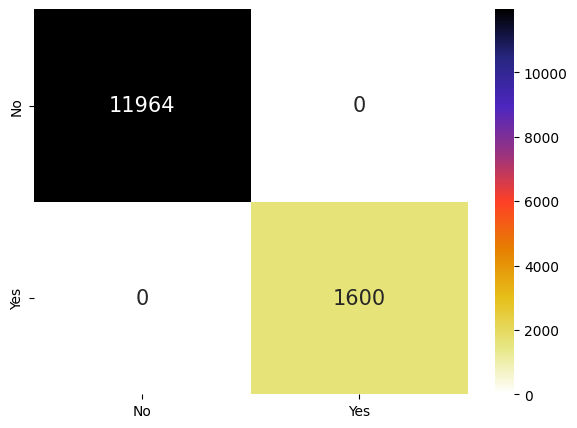

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, cmap = 'CMRmap_r', fmt = "d", cbar = True, xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'], annot_kws = {"fontsize":15})
plt.show()

Predict probability of test data: [No, Yes]

In [ ]:
print(lr_model.predict_proba(X_test))

[[9.99327000e-01 6.73000439e-04]
 [9.99539533e-01 4.60467379e-04]
 [9.98458767e-01 1.54123342e-03]
 ...
 [9.99538674e-01 4.61326221e-04]
 [9.99647399e-01 3.52601457e-04]
 [9.99365256e-01 6.34744146e-04]]


Summary of classification metrics for test set.

In [ ]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11964
           1       1.00      1.00      1.00      1600

    accuracy                           1.00     13564
   macro avg       1.00      1.00      1.00     13564
weighted avg       1.00      1.00      1.00     13564



**Logistic Regression Classification Model Summary**

Check for null and duplicate data values during preprocessing. Logistic regression model used to determine if customers will open a term deposit account. Use max_iters to optimize the model for higher accuracy.



**KNeighbors Classification Model**

Classify based on the nearest data points.

In [ ]:
kn_model = KNeighborsClassifier(n_neighbors = 3)

Train the data.

In [ ]:
kn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Make predictions on the train and test data.

In [ ]:
y_train_pred = kn_model.predict(X_train)
y_test_pred = kn_model.predict(X_test)

How many predictions were made correctly on training data, and the summary of classification metrics for the training set.

In [ ]:
kn_model.score(X_train, y_train)

0.9247638006762094

In [ ]:
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     27958
           1       0.76      0.51      0.61      3689

    accuracy                           0.92     31647
   macro avg       0.85      0.75      0.79     31647
weighted avg       0.92      0.92      0.92     31647



How many predictions were made correctly on test data, and the summary of classification metrics for the test set.

In [ ]:
metrics.accuracy_score(y_test_pred, y_test)

0.8734149218519611

In [ ]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     11964
           1       0.44      0.29      0.35      1600

    accuracy                           0.87     13564
   macro avg       0.68      0.62      0.64     13564
weighted avg       0.85      0.87      0.86     13564



Hyperparameter loop to see if there is a better cluster number to classify with.

In [ ]:
# knn_list = list(range(1, 22, 3))
# for i in knn_list:
#     knn1 = KNeighborsClassifier(n_neighbors = i)
#     knn1.fit(X_train,y_train)
#     Y_pred = knn1.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test,Y_pred)
#     train_acc = knn1.score(X_train,y_train)
#     print(f"For K = {i} test accuracy score is {accuracy} :".format(i,accuracy))
#     print(f"For K = {i} train accuracy score is {accuracy} :".format(i,train_acc))
#     print()